# Abstract

Forest fires are a major concern all over the world; each year, millions of hectares are lost. Algeria is one of the countries afflicted by this phenomena, which occurs primarily during the summer time. Forest fire detection and forecasting become critical issues for reducing the disaster's damage. Exploration of new fire detection and forecast systems as alternatives to existing ones becomes a necessity. The goal is to predict whether or not the fire will break out based on weather data.

#Information

## Data Set Information:



The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

122 instances for each region.

The period from June 2012 to September 2012.
The dataset includes 11 attribues and 1 output attribue (class)
The 244 instances have been classified into fired (138 classes) and not fired (106 classes) classes.

## Attribute information

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely â€œFireâ€ and â€œnot Fireâ€



# Importing the required libraries

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest, chi2, f_classif
import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix
from sklearn.metrics import classification_report, balanced_accuracy_score, explained_variance_score, precision_recall_curve
from sklearn.metrics import zero_one_loss, cohen_kappa_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import pickle
%matplotlib inline

# Reading the dataset

In [2]:
df = pd.read_csv('/content/Algerian_forest_fires_dataset_UPDATE.csv',header=1)
#display all the columns of the dataframe
pd.set_option('display.max_columns',None)

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [4]:
#Print shape of Dataset with rows and columns
print(df.shape)

(246, 14)


# Data Analysis

In Data analysis we will analyse to find the below stuff

1. Dataset info
2. Dataset description
3. Missing values
4. All the Numerical variables
5. Distribution of Numerical variables
6. Categorical variables
7. Outliers
8. Relationship between independent and dependent features

## Dataset Info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [6]:
df['day'].unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31',
       'Sidi-Bel Abbes Region Dataset', 'day'], dtype=object)

looks like the header is getting repeated for other region, so we need to remove those rows

In [7]:
data = df.copy()
print(data.shape)
data = data.dropna(how = 'all')
print(data.shape)

(246, 14)
(246, 14)


In [8]:
data.drop(data[data['day'] == 'Sidi-Bel Abbes Region Dataset'].index, inplace = True)

In [9]:
data.drop(data[data['day'] == 'day'].index, inplace = True)

In [10]:
data.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4    RH          244 non-null    object
 5    Ws          244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      243 non-null    object
dtypes: object(14)
memory usage: 28.6+ KB


In [12]:
#unique values in FWI column
data['FWI'].unique()

array(['0.5', '0.4', '0.1', '0', '2.5', '7.2', '7.1', '0.3', '0.9', '5.6',
       '7.1 ', '0.2', '1.4', '2.2', '2.3', '3.8', '7.5', '8.4', '10.6',
       '15', '13.9', '3.9', '12.9', '1.7', '4.9', '6.8', '3.2', '8',
       '0.6', '3.4', '0.8', '3.6', '6', '10.9', '4', '8.8', '2.8', '2.1',
       '1.3', '7.3', '15.3', '11.3', '11.9', '10.7', '15.7', '6.1', '2.6',
       '9.9', '11.6', '12.1', '4.2', '10.2', '6.3', '14.6', '16.1',
       '17.2', '16.8', '18.4', '20.4', '22.3', '20.9', '20.3', '13.7',
       '13.2', '19.9', '30.2', '5.9', '7.7', '9.7', '8.3', '0.7', '4.1',
       '1', '3.1', '1.9', '10', '16.7', '1.2', '5.3', '6.7', '9.5', '12',
       '6.4', '5.2', '3', '9.6', '4.7', 'fire   ', '14.1', '9.1', '13',
       '17.3', '30', '25.4', '16.3', '9', '14.5', '13.5', '19.5', '12.6',
       '12.7', '21.6', '18.8', '10.5', '5.5', '14.8', '24', '26.3',
       '12.2', '18.1', '24.5', '26.9', '31.1', '30.3', '26.1', '16',
       '19.4', '2.7', '3.7', '10.3', '5.7', '9.8', '19.3', '17.5',

We could see that one of the class value 'fire' moved into this FWI column. Looks like some values are not arranged properly.

Before that, the column names contains leading and trial spaces and also the target column values contains spaces. We need to trim those

## Correcting coloumn names and values

In [13]:
data.columns = data.columns.str.rstrip()
data.columns = data.columns.str.lstrip()

In [14]:
data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [15]:
data['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', nan, 'not fire    '], dtype=object)

In [16]:
data['Classes'] = data['Classes'].str.rstrip()
data['Classes'].unique()

array(['not fire', 'fire', nan], dtype=object)

Correcting the particular entry in the dataset which was not alligned properly earlier

In [17]:
data['ISI'] = np.where(data['DC'] == '14.6 9','9',data['ISI'])
data['BUI'] = np.where(data['DC'] == '14.6 9','12.5',data['BUI'])
data['FWI'] = np.where(data['DC'] == '14.6 9','10.4',data['FWI'])
data['Classes'] = np.where(data['DC'] == '14.6 9','fire',data['Classes'])
data['DC'] = np.where(data['DC'] == '14.6 9','14.6',data['DC'])

In [18]:
data['FWI'].unique()

array(['0.5', '0.4', '0.1', '0', '2.5', '7.2', '7.1', '0.3', '0.9', '5.6',
       '7.1 ', '0.2', '1.4', '2.2', '2.3', '3.8', '7.5', '8.4', '10.6',
       '15', '13.9', '3.9', '12.9', '1.7', '4.9', '6.8', '3.2', '8',
       '0.6', '3.4', '0.8', '3.6', '6', '10.9', '4', '8.8', '2.8', '2.1',
       '1.3', '7.3', '15.3', '11.3', '11.9', '10.7', '15.7', '6.1', '2.6',
       '9.9', '11.6', '12.1', '4.2', '10.2', '6.3', '14.6', '16.1',
       '17.2', '16.8', '18.4', '20.4', '22.3', '20.9', '20.3', '13.7',
       '13.2', '19.9', '30.2', '5.9', '7.7', '9.7', '8.3', '0.7', '4.1',
       '1', '3.1', '1.9', '10', '16.7', '1.2', '5.3', '6.7', '9.5', '12',
       '6.4', '5.2', '3', '9.6', '4.7', '10.4', '14.1', '9.1', '13',
       '17.3', '30', '25.4', '16.3', '9', '14.5', '13.5', '19.5', '12.6',
       '12.7', '21.6', '18.8', '10.5', '5.5', '14.8', '24', '26.3',
       '12.2', '18.1', '24.5', '26.9', '31.1', '30.3', '26.1', '16',
       '19.4', '2.7', '3.7', '10.3', '5.7', '9.8', '19.3', '17.5', '1

## Type casting column values to corresponding datatype

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4   RH           244 non-null    object
 5   Ws           244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 28.6+ KB


In [20]:
#Identifying integer and float columns
int_columns = data.columns[0:6]
int_columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws'], dtype='object')

In [21]:
float_columns = data.columns[6:-1]
float_columns

Index(['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI'], dtype='object')

In [22]:
data[int_columns] = data[int_columns].astype('int')
data[float_columns] = data[float_columns].astype('float')

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4   RH           244 non-null    int64  
 5   Ws           244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    object 
dtypes: float64(7), int64(6), object(1)
memory usage: 28.6+ KB


## Data description

In [24]:
data.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,244.000000,244.000000,244.0,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,15.754098,7.500000,2012.0,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288115,4.759836,16.673361,7.049180
std,8.825059,1.112961,0.0,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619662,4.154628,14.201648,7.428366
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000
50%,16.000000,7.500000,2012.0,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.450000,4.450000
75%,23.000000,8.000000,2012.0,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.375000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000


In [25]:
num_col = data._get_numeric_data().columns
num_col

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


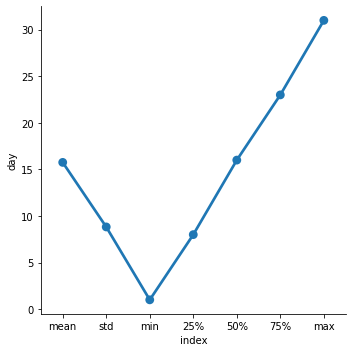

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


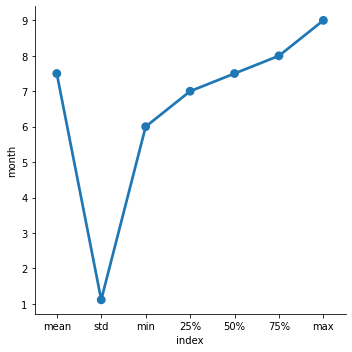

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


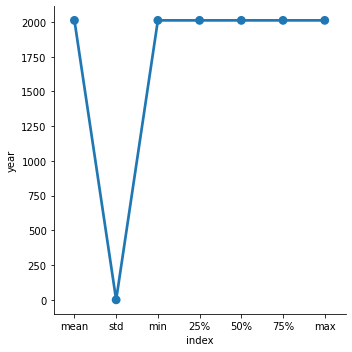

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


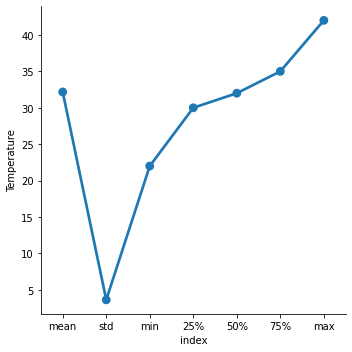

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


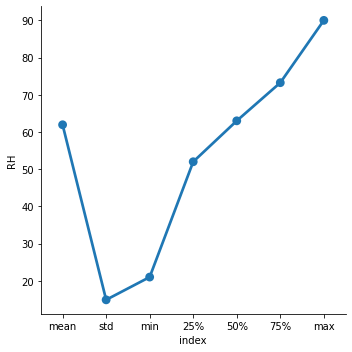

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


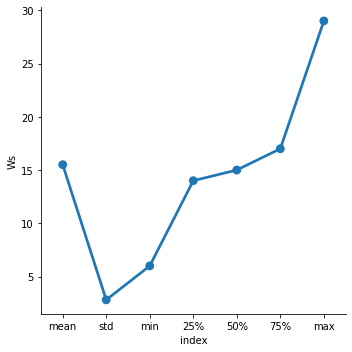

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


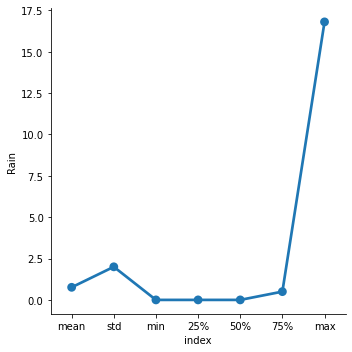

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


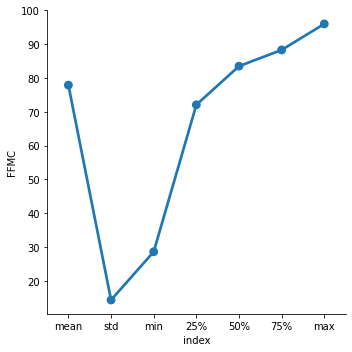

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


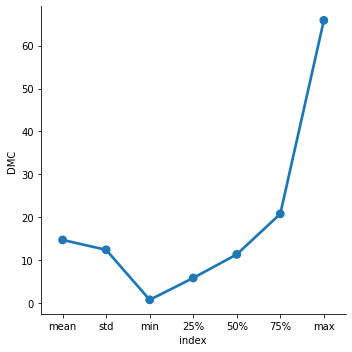

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


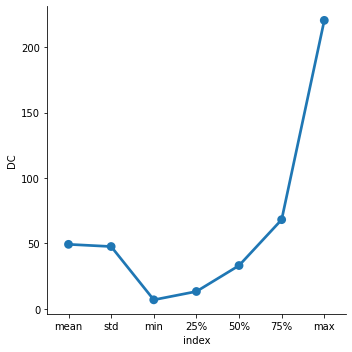

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


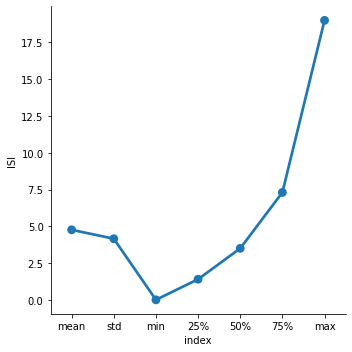

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


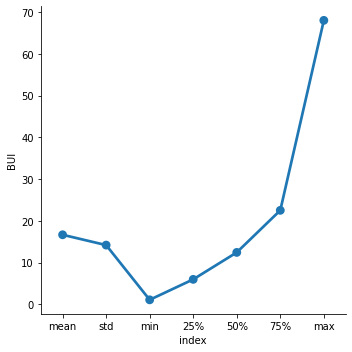

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


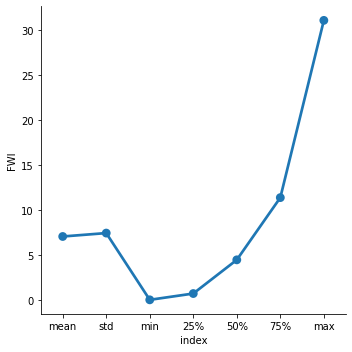

In [26]:
describe_num_df = data.describe(include=['int64','float64'])
describe_num_df.reset_index(inplace=True)
describe_num_df = describe_num_df[describe_num_df['index'] != 'count']
for i in num_col:
  if i in ['index']:
    continue
  sns.factorplot(x="index", y=i, data=describe_num_df)
  plt.show()

Based on the above summary, we could see that the data collected are from the year 2012 from june to September as described in the explanation also. 

The average temperature was 32.17 celcius.

Looks like there might be some outlier in DC. Proceeding with further analysis

## Missing Values

In [27]:
data.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

There is no NULL or Missing values in the dataset

## Numerical Variable analysis

In [28]:
numerical_features = [feature for feature in data.columns if data[feature].dtypes!='O']

In [29]:
print(len(numerical_features))

13


In [30]:
numerical_features

['day',
 'month',
 'year',
 'Temperature',
 'RH',
 'Ws',
 'Rain',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI']

In [31]:
data[numerical_features].head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5


In [32]:
#Temporal Variables (Datetime variables)
date_feature = [feature for feature in numerical_features if 'day' in feature or 'year' in feature or 'month' in feature]

In [33]:
date_feature

['day', 'month', 'year']

Three features are related to date time day, month, year

In [34]:
for feature in date_feature:
    print(feature, data[feature].unique())

day [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
month [6 7 8 9]
year [2012]


### Which month/day most fire breakout would have happened in the year 2012 from June to September

In [35]:
px.histogram(data, x='month', color="Classes", barmode='group')

We could see from the above graph that most of the forest fires happens during August and it holds true by comparing other year's data externally

In [36]:
px.histogram(data, x='day', color="Classes", barmode='group')

The maximum fire breakout happened in the mid of the months

### Discrete Feature

In [37]:
discreate_feature = [feature for feature in numerical_features if len(data[feature].unique())<=25 and feature not in date_feature]

In [38]:
len(discreate_feature)

2

In [39]:
discreate_feature

['Temperature', 'Ws']

In [40]:
data[discreate_feature].head()

,Temperature,Ws
0,29,18
1,29,13
2,26,22
3,25,13
4,27,16


#### Distribution of Discrete variables

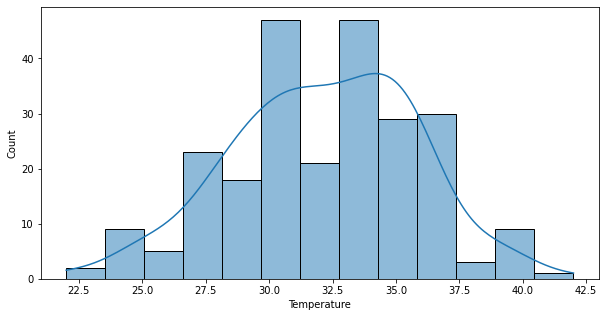

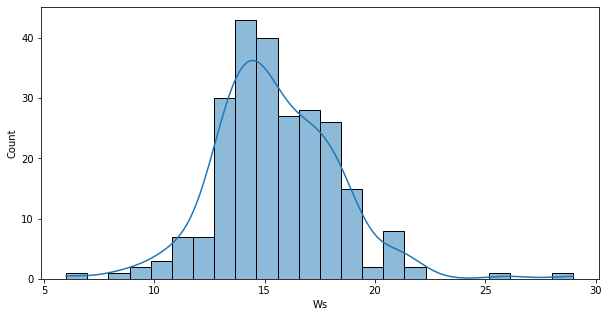

In [41]:
for i in discreate_feature:
  plt.figure(figsize=(10,5))
  sns.histplot(data = data, x=i, kde = True)
  plt.show()

#### Find the relationship between discrete and Classes

In [42]:
for i in discreate_feature:
  fig = px.histogram(data, x=i, color="Classes", barmode='group')
  fig.show()

We could see from the above graph that most of the forest fires happens when the temparature in the range 30 to 36 and Wind speed in the range 14 to 17

### Continuous Features

In [43]:
continuous_feature = [feature for feature in numerical_features if feature not in discreate_feature+date_feature ]

In [44]:
continuous_feature

['RH', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']

In [45]:
len(continuous_feature)

8

#### Distribution of Continuous features

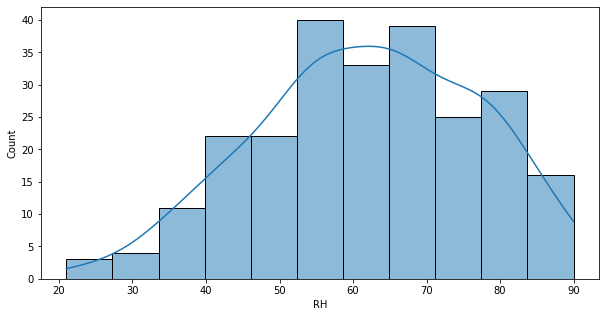

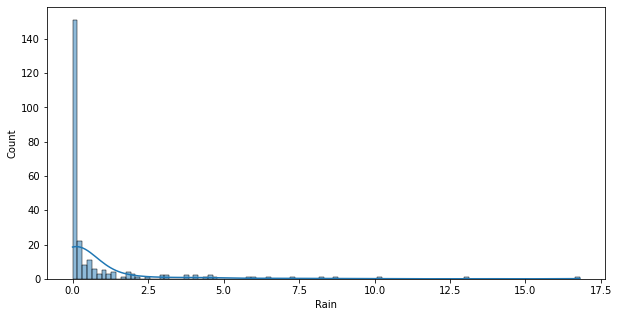

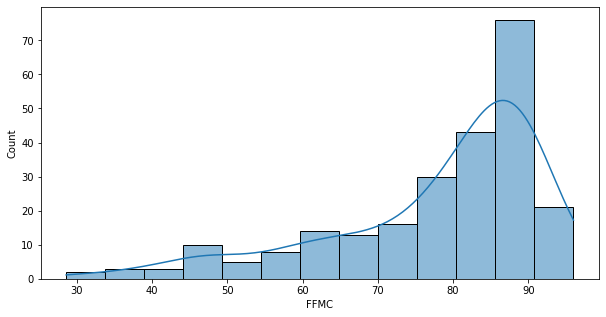

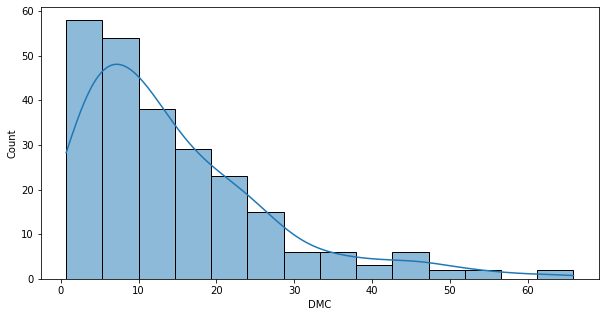

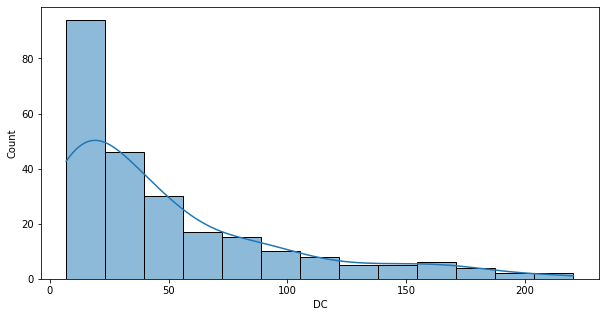

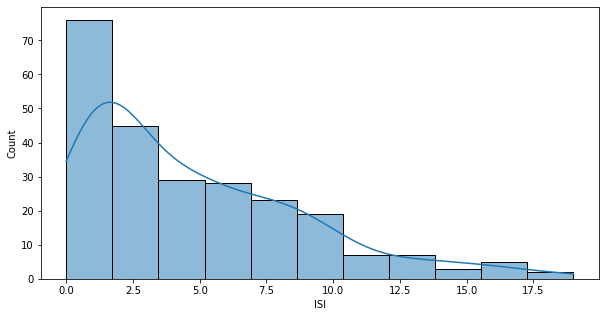

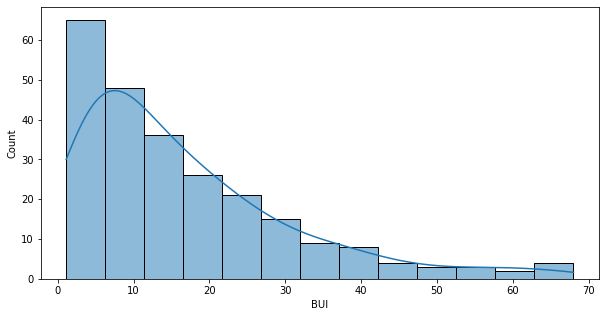

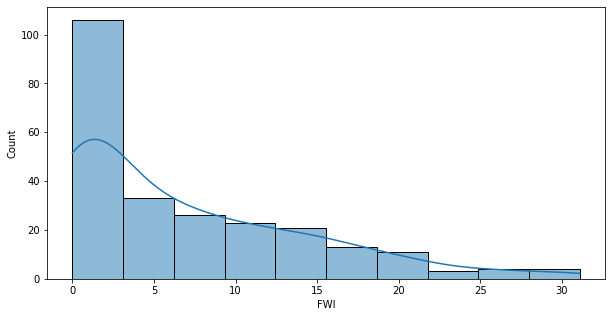

In [46]:
for i in continuous_feature:
  plt.figure(figsize=(10,5))
  sns.histplot(data = data, x=i, kde = True)
  plt.show()

Based on the above graphs, we could see most of the columns are log-normal distributed.

#### Find the relationship between Continuous and Classes

AxesSubplot(0.125,0.734808;0.287037x0.145192)
AxesSubplot(0.612963,0.734808;0.287037x0.145192)
AxesSubplot(0.125,0.531538;0.287037x0.145192)
AxesSubplot(0.612963,0.531538;0.287037x0.145192)
AxesSubplot(0.125,0.328269;0.287037x0.145192)
AxesSubplot(0.612963,0.328269;0.287037x0.145192)
AxesSubplot(0.125,0.125;0.287037x0.145192)
AxesSubplot(0.612963,0.125;0.287037x0.145192)


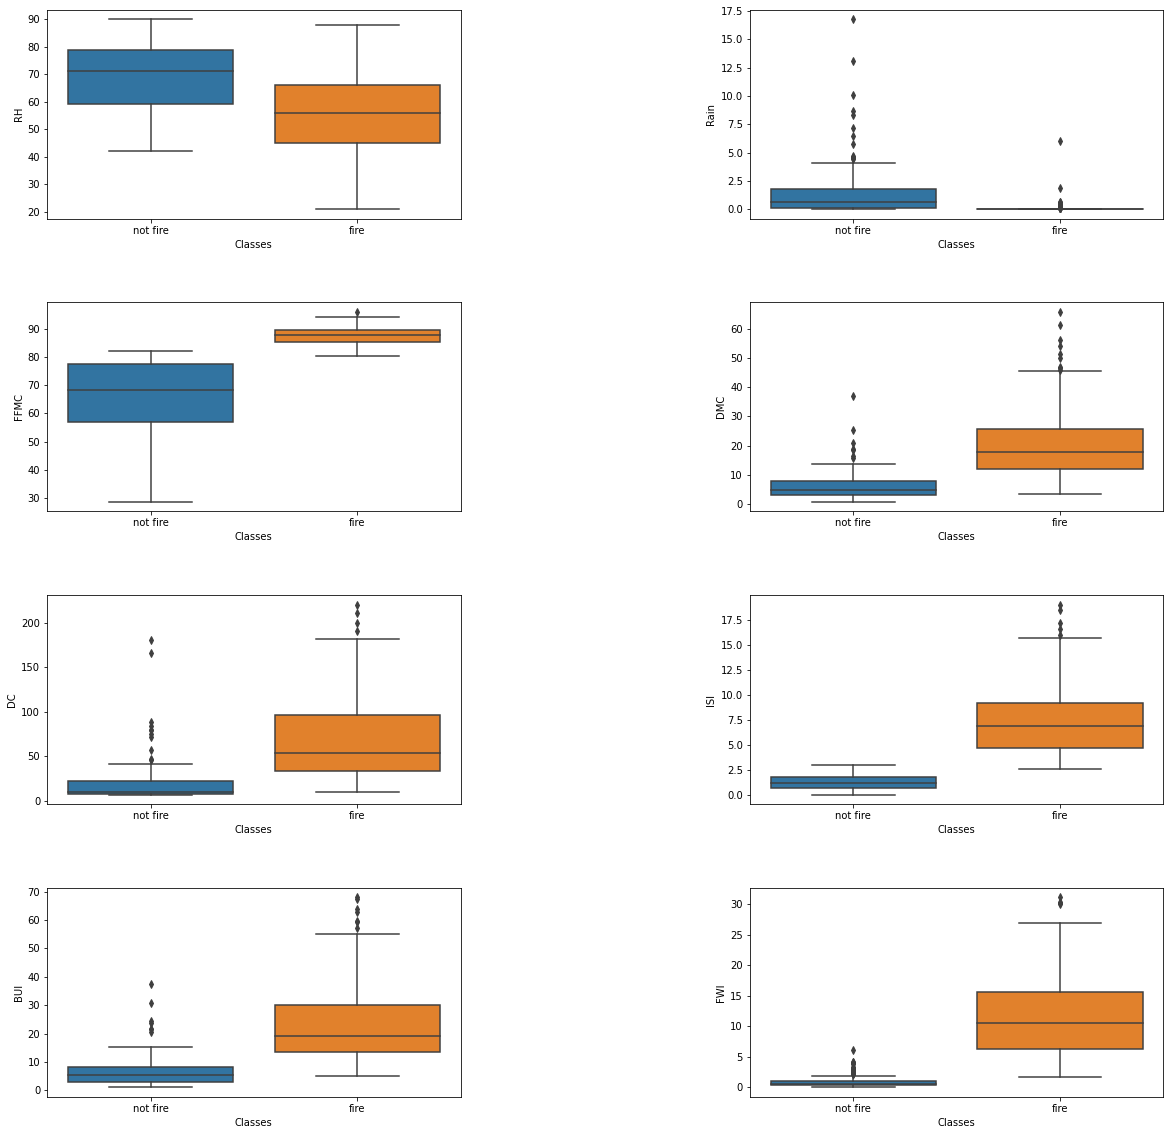

In [47]:
fig, axes = plt.subplots(4, 2, figsize=(20,20))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.7, hspace=0.4)
for i, ax in enumerate(axes.ravel()):
  print(ax)
  if i > 10:
    ax.set_visible(False)
    continue
  sns.boxplot(x = 'Classes', y = continuous_feature[i], data=data, ax=ax)
plt.show()

As expected, when there is no rain the chance of fire is there. 

When BUI is between 20 to 30, the chance of Fire is more.

When DC is between 50 to 100, the chance of Fire is more.

When FFMC is more there is a chance of Fire

When DMC is between 15 to 30, the chance of Fire is more.

When FWI is between 6 to 17, the chance of Fire is more.

## Target Analysis

In [48]:
fig = px.histogram(data, x='Classes', color="Classes", barmode='group')
fig.show()

In [49]:
data['Classes'].value_counts()/len(data['Classes'])*100

fire        56.557377
not fire    43.442623
Name: Classes, dtype: float64

Based on the graph as well as the ratio calculation, The classes are equally balanced and there is no class imbalance

## Relationship between independent variables

In [50]:
index_vals = data['Classes'].astype('category').cat.codes
fig = go.Figure(data=go.Splom(
                dimensions=[dict(label='Temperature',
                                 values=data['Temperature']),
                            dict(label='RH',
                                 values=data['RH']),
                            dict(label='Ws',
                                 values=data['Ws']),
                            dict(label='Rain',
                                 values=data['Rain']),
                            dict(label='FFMC',
                                 values=data['FFMC']),
                            dict(label='DMC',
                                 values=data['DMC']),
                            dict(label='DC',
                                 values=data['DC']),  
                            dict(label='ISI',
                                 values=data['ISI']), 
                            dict(label='BUI',
                                 values=data['BUI']), 
                            dict(label='FWI',
                                 values=data['FWI'])                                                                                                                                                                       
                            ],
                showupperhalf=False, # remove plots on diagonal
                text=data['Classes'],
                marker=dict(color=index_vals,
                            showscale=False, # colors encode categorical variables
                            line_color='white', line_width=0.5)
                ))


fig.update_layout(
    title='Algerian Fire Data set',
    width=1200,
    height=1200,
)

fig.show()


In [51]:
fig = px.scatter_matrix(data,
    dimensions=['Temperature','RH','Ws','Rain','FFMC','DMC','DC','ISI','BUI','FWI'])

fig.update_layout(
    title='Algerian Fire Data set',
    width=1200,
    height=1200,
)

fig.show()

Based on the above graphs we could see the following:

1. Strong linear relationship between DMC and BUI
2. Strong linear relationship between DMC and FWI
3. Strong linear relationship between DMC and DC
4. Strong linear relationship between FWI and ISI
5. exponential relationship between FFMC and FWI
6. negative linear relationship between ISI and RH
7. RH is inversely related to Temperature

## Outlier Detection

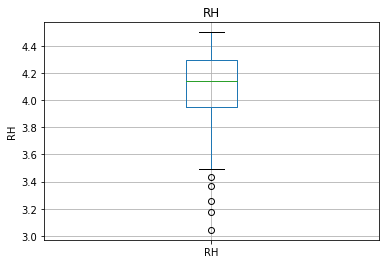

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning:

invalid value encountered in subtract



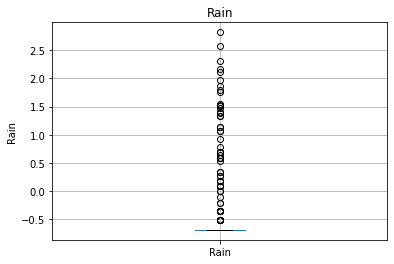

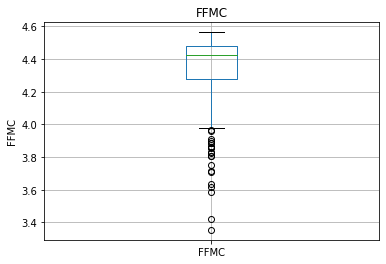

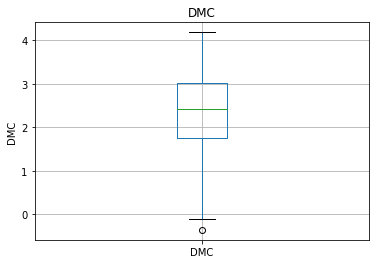

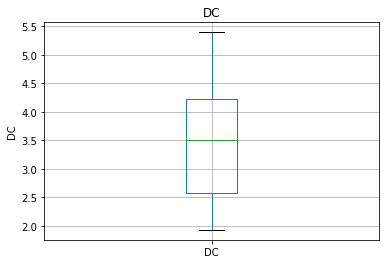

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning:

divide by zero encountered in log



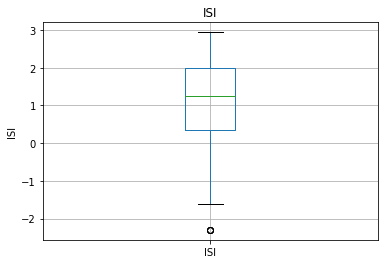

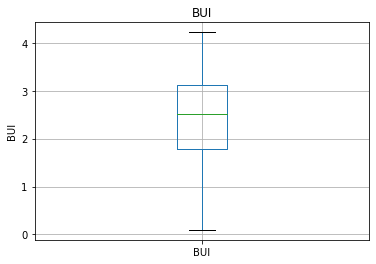

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning:

divide by zero encountered in log



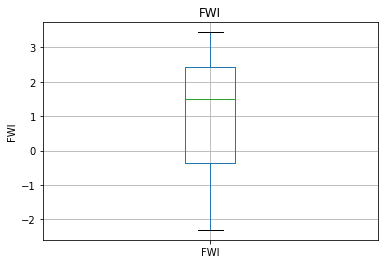

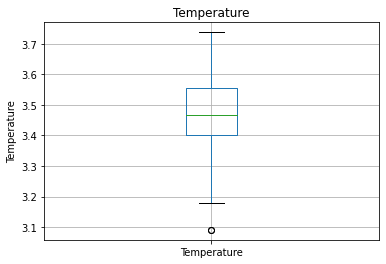

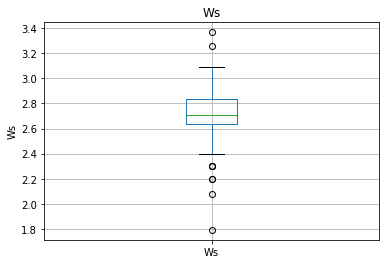

In [52]:
#Outliers 
data1 = data.copy()
con_disc_features = continuous_feature + discreate_feature
for feature in con_disc_features:
  data1[feature] = np.log(data[feature])
  data1.boxplot(column=feature)
  plt.ylabel(feature)
  plt.title(feature)
  plt.show()

**Statistical way**

In [53]:
data1 = data[con_disc_features]
    
Q1 = data1.quantile(0.25)
Q3 = data1.quantile(0.75)
IQR = Q3 - Q1
    
ans = ((data1 < (Q1 - 1.5 * IQR)) | (data1 > (Q3 + 1.5 * IQR))).sum()
outlier_df = pd.DataFrame(ans).reset_index().rename(columns = {'index':'column', 0:'count_of_outliers'})
outlier_df

,column,count_of_outliers
0,RH,0
1,Rain,35
2,FFMC,16
3,DMC,12
4,DC,15
5,ISI,4
6,BUI,12
7,FWI,4
8,Temperature,2
9,Ws,8


In [54]:
#Finding the upper or lower fence value

for i in con_disc_features:
  upper_bound = data[i].quantile(0.75) + 1.5*(data[i].quantile(0.75) - data[i].quantile(0.25))
  lower_bound = data[i].quantile(0.25) - 1.5*(data[i].quantile(0.75) - data[i].quantile(0.25))
  if upper_bound > 0:
    print(i, " : ",' above: ', upper_bound, 'are outliers')
  if lower_bound > 0:
    print(i, " : ",' below: ', lower_bound, 'are outliers')

RH  :   above:  105.125 are outliers
RH  :   below:  20.125 are outliers
Rain  :   above:  1.25 are outliers
FFMC  :   above:  112.63749999999999 are outliers
FFMC  :   below:  47.73750000000001 are outliers
DMC  :   above:  43.175 are outliers
DC  :   above:  150.46250000000003 are outliers
ISI  :   above:  16.150000000000002 are outliers
BUI  :   above:  47.3125 are outliers
FWI  :   above:  27.387500000000003 are outliers
Temperature  :   above:  42.5 are outliers
Temperature  :   below:  22.5 are outliers
Ws  :   above:  21.5 are outliers
Ws  :   below:  9.5 are outliers


## Skewness check

In [55]:
num_data = data[con_disc_features]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

,RH,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Temperature,Ws
skewness,-0.237964,4.579071,-1.325633,1.527652,1.479042,1.12695,1.458466,1.143243,-0.196309,0.545881
kurtosis,-0.530328,25.942123,1.055208,2.487598,1.614097,0.82986,1.979913,0.655316,-0.154310,2.602156


We could see there is heavy skewness and Kurtosis in Rain column

In [56]:
data['Rain'].value_counts()/len(data['Rain'])*100

0.0     54.508197
0.1      7.377049
0.2      4.918033
0.3      4.098361
0.4      3.278689
0.7      2.459016
0.6      2.459016
0.5      2.049180
1.1      1.229508
1.2      1.229508
2.0      1.229508
1.8      1.229508
0.8      0.819672
2.9      0.819672
1.3      0.819672
3.8      0.819672
1.4      0.819672
1.0      0.819672
3.1      0.819672
16.8     0.409836
4.5      0.409836
6.5      0.409836
4.1      0.409836
13.1     0.409836
1.9      0.409836
6.0      0.409836
2.2      0.409836
1.7      0.409836
2.5      0.409836
4.7      0.409836
8.7      0.409836
7.2      0.409836
4.0      0.409836
5.8      0.409836
8.3      0.409836
4.6      0.409836
0.9      0.409836
10.1     0.409836
4.4      0.409836
Name: Rain, dtype: float64

The huge number of skewness and kurtosis is because of the value 0.0 which occupied 55% of data. Looks like it could be the possible scenario that if there is no rain then it will be marked as 0.0

## Correlation check





In [57]:
corr =data[con_disc_features].corr()
corr

,RH,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Temperature,Ws
RH,1.000000,0.222968,-0.645658,-0.405133,-0.220330,-0.688268,-0.349685,-0.580457,-0.654443,0.236084
Rain,0.222968,1.000000,-0.544045,-0.288548,-0.296804,-0.347862,-0.299409,-0.324755,-0.326786,0.170169
FFMC,-0.645658,-0.544045,1.000000,0.602391,0.503910,0.740751,0.590251,0.691430,0.677491,-0.163255
DMC,-0.405133,-0.288548,0.602391,1.000000,0.875358,0.678355,0.982206,0.875191,0.483105,-0.001246
DC,-0.220330,-0.296804,0.503910,0.875358,1.000000,0.503919,0.941672,0.737041,0.370498,0.076245
ISI,-0.688268,-0.347862,0.740751,0.678355,0.503919,1.000000,0.641351,0.922422,0.605971,0.012245
BUI,-0.349685,-0.299409,0.590251,0.982206,0.941672,0.641351,1.000000,0.856912,0.456415,0.030303
FWI,-0.580457,-0.324755,0.691430,0.875191,0.737041,0.922422,0.856912,1.000000,0.566839,0.033957
Temperature,-0.654443,-0.326786,0.677491,0.483105,0.370498,0.605971,0.456415,0.566839,1.000000,-0.278132
Ws,0.236084,0.170169,-0.163255,-0.001246,0.076245,0.012245,0.030303,0.033957,-0.278132,1.000000


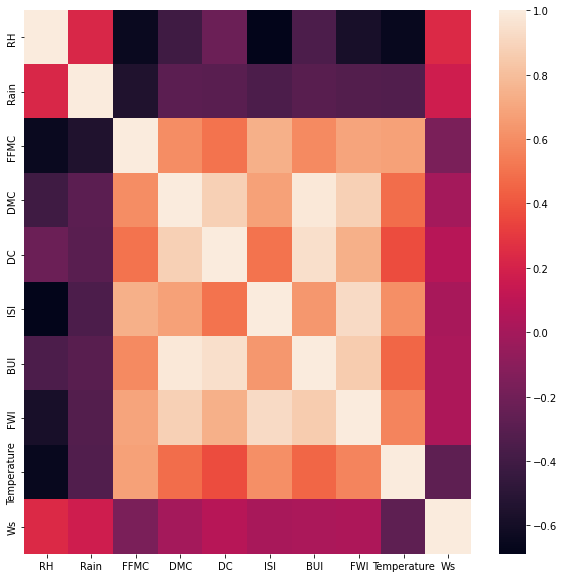

In [58]:
plt.figure(figsize=(10,10))
sns.heatmap(corr)

# Feature Engineering

## Change the Target column values

Fire will be replaced with 1 and not fire will be replaced with 0

In [59]:
data['Classes'] = np.where(data['Classes'] == 'fire',1,0)

In [60]:
data['Classes'].unique()

array([0, 1])

## Dropping duplicates

In [61]:
print(data.shape)
data = data.drop_duplicates()
print(data.shape)

(244, 14)
(244, 14)


There are no duplicates

## Remove unwanted feature

We can remove the year feature as it is having only one year that is 2012. Day and month also not required

In [62]:
data = data.drop(['year','day','month'],axis=1)
data.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0


## Feature Scaling

### Train-Test Split

In [63]:
X = data.iloc[:,:-1]
Y = data.iloc[:,-1]
X_train,X_test,y_train,y_test=train_test_split(X,Y,train_size=0.7,random_state=221)

In [64]:
X_train.shape

(170, 10)

In [65]:
X_test.shape

(74, 10)

In [66]:
y_train

243    0
165    1
134    1
61     0
74     1
      ..
139    0
114    0
182    1
232    1
76     1
Name: Classes, Length: 170, dtype: int64

### Standard Scaler

In [67]:
Scale_standard = StandardScaler()

In [68]:
X_train_scaled = Scale_standard.fit_transform(X_train)

In [69]:
X_train_scaled

array([[-1.47563304,  1.68650225,  5.00604665, ..., -1.0804491 ,
        -0.9521914 , -0.94412873],
       [ 1.03853016, -1.17788703, -0.90386953, ...,  0.8225583 ,
        -0.28562726,  0.32562191],
       [-0.35822717, -1.31111443,  2.05108856, ...,  2.05108207,
         0.11724118,  1.28468888],
       ...,
       [ 0.47982722, -0.17868147,  0.20423975, ...,  0.60575999,
         0.22711439,  0.50122572],
       [ 0.47982722, -1.17788703, -1.2732393 , ...,  1.52113064,
         0.71788139,  1.39275277],
       [ 1.03853016, -0.04545406,  0.94297927, ..., -0.50232027,
         0.08794166, -0.40380931]])

In [70]:
X_test_scaled = Scale_standard.fit_transform(X_test)

In [71]:
X_test_scaled

array([[ 1.36623433, -0.45118577, -1.53910731, -0.47311034,  0.72834634,
        -0.31951732, -0.57311228,  0.17680601, -0.41241064, -0.11136528],
       [-2.66706383,  0.93132963,  3.44167727,  2.83650664, -2.03351013,
        -1.07980782, -0.82562292, -0.98834234, -1.02748962, -0.89237801],
       [ 1.09734779, -2.31758155,  0.78525883, -0.47311034,  1.17714801,
         1.81832924,  0.58231517,  3.40523791,  1.4524565 ,  3.13387726],
       [-0.51597148, -0.58943731, -0.54295039,  0.76301167, -0.43853802,
        -0.33457258, -0.78545077, -0.76987702, -0.4451276 , -0.79811785],
       [ 1.90400742, -1.34982077, -1.207055  , -0.47311034,  1.02524591,
         0.079447  , -0.36842563,  1.24485867, -0.05906739,  0.80430481],
       [-2.66706383,  1.62258732, -0.21089809,  3.5542549 , -3.20039448,
        -1.10991834, -0.82562292, -1.08543804, -1.06020659, -0.90584375],
       [ 0.29068816, -0.03643115, -1.87115961,  2.99600626, -0.78377008,
        -0.81634082, -0.80075444, -0.86697272

## Feature Selection

In [72]:
#apply SelectKBest class to extract top k best features
# k is the number of features you want to select [here it's 6]
bestfeatures = SelectKBest(f_classif, k=6)
fit = bestfeatures.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(15,'Score'))  #print  feature scores of all

         Specs       Score
4         FFMC  257.076958
7          ISI  183.774394
9          FWI  162.828849
0  Temperature  101.654918
5          DMC   86.698544
8          BUI   81.607372
6           DC   53.719074
1           RH   49.944235
3         Rain   19.167461
2           Ws    0.758599


# Model Building

## Preliminary model evaluation using default parameters - Part 1

In this part we are going to check with models that require feature scaling

In [73]:
model_dict = {'Logistic Regression' : LogisticRegression(random_state=3),
              'K Nearest Neighbor': KNeighborsClassifier(),
              'SVC' : SVC(),
              }


#Function to get the scores for each model in a df
def model_score_df(model_dict, xtr,ytr,xte,yte):   
    model_name, ac_score_list, p_score_list, r_score_list, f1_score_list = [], [], [], [], []
    for k,v in model_dict.items():   
        model_name.append(k)
        v.fit(xtr, ytr)
        y_pred = v.predict(xte)
        ac_score_list.append(accuracy_score(yte, y_pred))
        p_score_list.append(precision_score(yte, y_pred, average='macro'))
        r_score_list.append(recall_score(yte, y_pred, average='macro'))
        f1_score_list.append(f1_score(yte, y_pred, average='macro'))
        model_comparison_df = pd.DataFrame([model_name, ac_score_list, p_score_list, r_score_list, f1_score_list]).T
        model_comparison_df.columns = ['model_name', 'accuracy_score', 'precision_score', 'recall_score', 'f1_score']
        model_comparison_df = model_comparison_df.sort_values(by='f1_score', ascending=False)
    return model_comparison_df

model_score_df(model_dict,X_train_scaled,y_train,X_test_scaled,y_test)

,model_name,accuracy_score,precision_score,recall_score,f1_score
0,Logistic Regression,0.945946,0.95122,0.945946,0.945788
2,SVC,0.905405,0.912946,0.905405,0.904972
1,K Nearest Neighbor,0.891892,0.911111,0.891892,0.890613


Logistic regression performing great in this aspect

## Preliminary model evaluation using default parameters - Part 2

In [74]:
model_dict1 = {'Random Forest': RandomForestClassifier(random_state=3),
              'Decsision Tree': DecisionTreeClassifier(random_state=3),
              'AdaBoost': AdaBoostClassifier(random_state=3),
              'Gaussian Naive Bayes': GaussianNB()
}

In [75]:
model_score_df(model_dict1,X_train,y_train,X_test,y_test)

,model_name,accuracy_score,precision_score,recall_score,f1_score
0,Random Forest,0.972973,0.974359,0.972973,0.972953
1,Decsision Tree,0.972973,0.974359,0.972973,0.972953
2,AdaBoost,0.972973,0.974359,0.972973,0.972953
3,Gaussian Naive Bayes,0.945946,0.947253,0.945946,0.945906


# Hyper Parameter Tuning

## Hyper Parameter Tuning for Logistic Regression

In [78]:
model = LogisticRegression()
grid_vals = {'C': [0.001,0.01,0.1,1]}
grid_lr = GridSearchCV(estimator=model, param_grid=grid_vals, scoring='accuracy', 
                       cv=6, refit=True, return_train_score=True) 

In [79]:
grid_lr.fit(X_train_scaled, y_train)

GridSearchCV(cv=6, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1]}, return_train_score=True,
             scoring='accuracy')

In [81]:
print(grid_lr.best_estimator_)
print(grid_lr.best_params_)
print(grid_lr.best_index_)
print(grid_lr.best_score_)

LogisticRegression(C=0.1)
{'C': 0.1}
2
0.9415024630541873


## Hyper Parameter Tuning for Random Forest

In [83]:
model_rf = RandomForestClassifier()
grid_vals_rf = {'n_estimators' : [50,100,150,200], 'max_depth' : [3,5,7,9], 'n_jobs' : [3,5]}
grid_rf = GridSearchCV(estimator=model_rf, param_grid=grid_vals_rf, scoring='accuracy', 
                       cv=6, refit=True, return_train_score=True) 

In [84]:
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=6, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7, 9],
                         'n_estimators': [50, 100, 150, 200],
                         'n_jobs': [3, 5]},
             return_train_score=True, scoring='accuracy')

In [85]:
print(grid_rf.best_estimator_)
print(grid_rf.best_params_)
print(grid_rf.best_index_)
print(grid_rf.best_score_)

RandomForestClassifier(max_depth=5, n_jobs=3)
{'max_depth': 5, 'n_estimators': 100, 'n_jobs': 3}
10
0.9883004926108375


In [86]:
y_pred_rf = grid_rf.best_estimator_.predict(X_test)
print("Accuracy Score : ", accuracy_score(y_test, y_pred_rf))
print("Precision Score : ", precision_score(y_test, y_pred_rf, average='macro'))
print("Recall Score : ", recall_score(y_test, y_pred_rf, average='macro'))
print("F1 Score : ", f1_score(y_test, y_pred_rf, average='macro'))

Accuracy Score :  0.972972972972973
Precision Score :  0.9743589743589743
Recall Score :  0.972972972972973
F1 Score :  0.972953216374269


## Hyper Parameter Tuning for Decision Trees

In [89]:
model_dt = DecisionTreeClassifier()
grid_vals_dt = {'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]}
grid_dt = GridSearchCV(estimator=model_dt, param_grid=grid_vals_dt, scoring='accuracy', 
                       cv=6, refit=True, return_train_score=True) 

In [90]:
grid_dt.fit(X_train, y_train)

GridSearchCV(cv=6, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             return_train_score=True, scoring='accuracy')

In [91]:
print(grid_dt.best_estimator_)
print(grid_dt.best_params_)
print(grid_dt.best_index_)
print(grid_dt.best_score_)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=10)
{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 10}
1
0.9825533661740559


In [92]:
y_pred_dt = grid_dt.best_estimator_.predict(X_test)
print("Accuracy Score : ", accuracy_score(y_test, y_pred_dt))
print("Precision Score : ", precision_score(y_test, y_pred_dt, average='macro'))
print("Recall Score : ", recall_score(y_test, y_pred_dt, average='macro'))
print("F1 Score : ", f1_score(y_test, y_pred_dt, average='macro'))

Accuracy Score :  0.9594594594594594
Precision Score :  0.9625
Recall Score :  0.9594594594594594
F1 Score :  0.9593927199561003


# Model Save

Based on the hyper parameter tuning, we could see that the random forest model works well. So we are picking it up and saving the model

In [88]:
filename = 'model_rf.pkl'
pickle.dump(grid_rf.best_estimator_, open(filename, 'wb'))